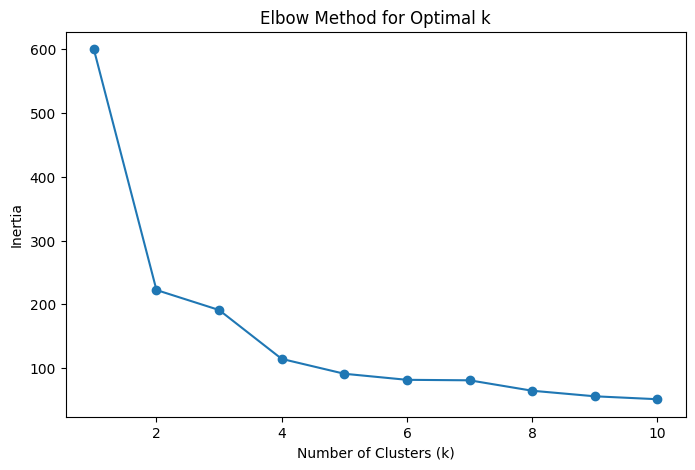


--- Data with Cluster Labels ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster Actual_Species  
0        1         setosa  
1        2         setosa  
2        2         setosa  
3        2         setosa  
4        1         setosa  


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris # Used for internal loading

# --- 1. Load and Prepare Data ---

# Load the Iris dataset internally (more robust than file loading)
iris = load_iris()
X = iris.data  # Features (SepalLength, SepalWidth, PetalLength, PetalWidth)
target_names = iris.target_names

# Convert to DataFrame for easier manipulation and adding cluster labels later
data = pd.DataFrame(X, columns=iris.feature_names)

# Standardize the data (In [28])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# --- 2. Elbow Method to Find Optimal k --- (In [31])

inertia = []
k_range = range(1, 11)

# Calculate inertia for each k
for k in k_range:
    # Added n_init='auto' for modern sklearn versions
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


# --- 3. Apply K-Means Clustering (k=3) --- (In [32])

# Based on the elbow plot and knowledge of the Iris dataset (3 species)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')

# Fit the model and predict the cluster labels
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster Labels to the original data (In [33])
data['Cluster'] = clusters

# Add the actual species names for comparison (optional, but helpful for analysis)
data['Actual_Species'] = iris.target
data['Actual_Species'] = data['Actual_Species'].apply(lambda x: target_names[x])

print("\n--- Data with Cluster Labels ---")
print(data.head())